In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import matplotlib.pyplot as plt

# Данные для пай диаграммы
labels = ['Главные персонажи', 'Второстепенные персонажи', 'Антагонисты', 'Существа и создания', 'Магические предметы и места']
sizes = [30, 25, 20, 15, 10]
colors = ['gold', 'lightcoral', 'lightskyblue', 'lightgreen', 'yellowgreen']
explode = (0.1, 0, 0, 0, 0)  # выделить первый сектор

# Создание пай диаграммы
plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')  # Равные оси, чтобы сделать круг
plt.title('Типы имен собственных в книгах о Гарри Поттере')
plt.show()

In [2]:
df = pd.read_csv('insurance.csv')
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


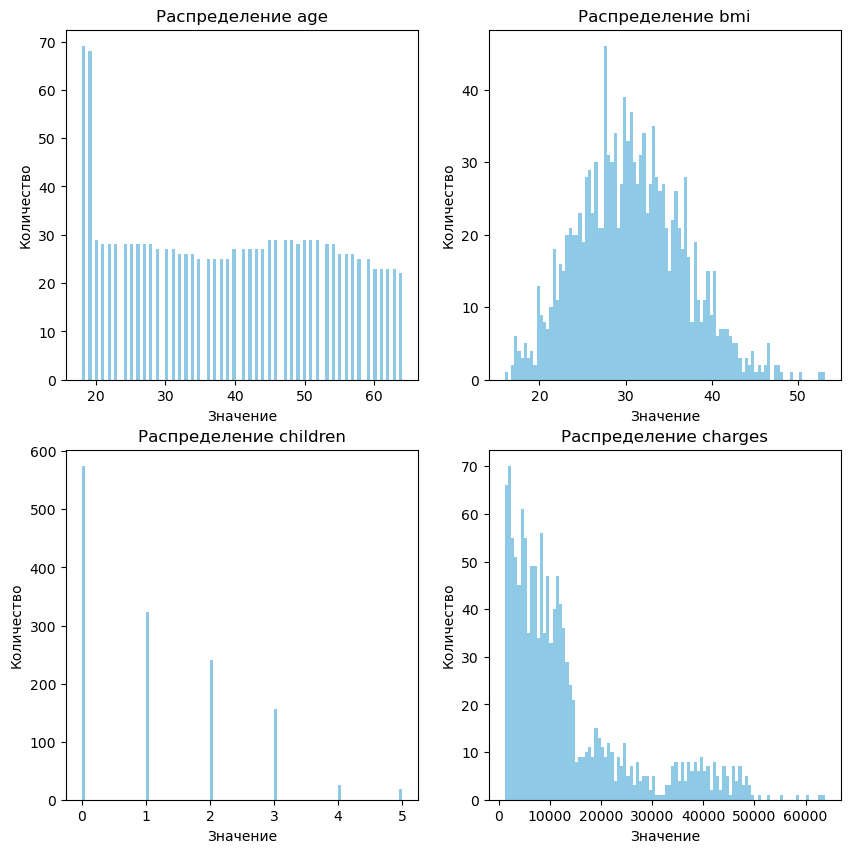

In [3]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

for i in range(2):
    for j in range(2):
        axs[i, j].hist(df[numerical_columns[i * 2 + j]], bins=100, color='#8ecae6')
        axs[i, j].set_title(f'Распределение {numerical_columns[i * 2 + j]}')
        axs[i, j].set_xlabel('Значение')
        axs[i, j].set_ylabel('Количество')


plt.show()

Меры центральной тенденции и меры разброса для bmi:
Среднее значение: 30.66
Медиана: 30.40
Мода: 32.30
Стандартное отклонение: 6.10
Дисперсия: 37.19

Меры центральной тенденции и меры разброса для charges:
Среднее значение: 13270.42
Медиана: 9382.03
Мода: 1639.56
Стандартное отклонение: 12110.01
Дисперсия: 146652372.15


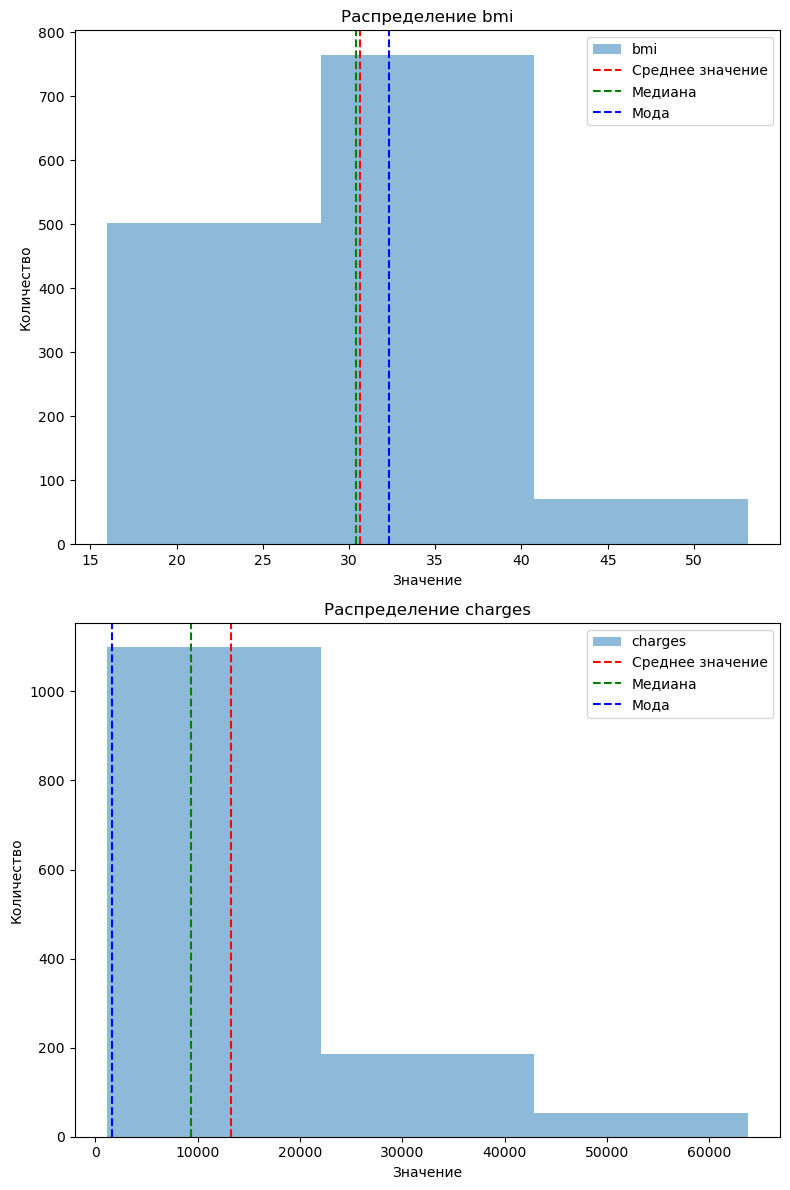

In [4]:
bmi_mean = df['bmi'].mean()
bmi_median = df['bmi'].median()
bmi_mode = df['bmi'].mode().iloc[0]
bmi_std = df['bmi'].std()
bmi_var = df['bmi'].var()

charges_mean = df['charges'].mean()
charges_median = df['charges'].median()
charges_mode = df['charges'].mode().iloc[0]
charges_std = df['charges'].std()
charges_var = df['charges'].var()

print("Меры центральной тенденции и меры разброса для bmi:")
print(f"Среднее значение: {bmi_mean:.2f}")
print(f"Медиана: {bmi_median:.2f}")
print(f"Мода: {bmi_mode:.2f}")
print(f"Стандартное отклонение: {bmi_std:.2f}")
print(f"Дисперсия: {bmi_var:.2f}")

print("\nМеры центральной тенденции и меры разброса для charges:")
print(f"Среднее значение: {charges_mean:.2f}")
print(f"Медиана: {charges_median:.2f}")
print(f"Мода: {charges_mode:.2f}")
print(f"Стандартное отклонение: {charges_std:.2f}")
print(f"Дисперсия: {charges_var:.2f}")

fig, axs = plt.subplots(2, 1, figsize=(8, 6*2))

axs[0].hist(df['bmi'], bins=3, alpha=0.5, label='bmi')
axs[0].axvline(bmi_mean, color='r', linestyle='--', label='Среднее значение')
axs[0].axvline(bmi_median, color='g', linestyle='--', label='Медиана')
axs[0].axvline(bmi_mode, color='b', linestyle='--', label='Мода')
axs[0].set_title('Распределение bmi')
axs[0].set_xlabel('Значение')
axs[0].set_ylabel('Количество')
axs[0].legend()

axs[1].hist(df['charges'], bins=3, alpha=0.5, label='charges')
axs[1].axvline(charges_mean, color='r', linestyle='--', label='Среднее значение')
axs[1].axvline(charges_median, color='g', linestyle='--', label='Медиана')
axs[1].axvline(charges_mode, color='b', linestyle='--', label='Мода')
axs[1].set_title('Распределение charges')
axs[1].set_xlabel('Значение')
axs[1].set_ylabel('Количество')
axs[1].legend()

plt.tight_layout()
plt.show()

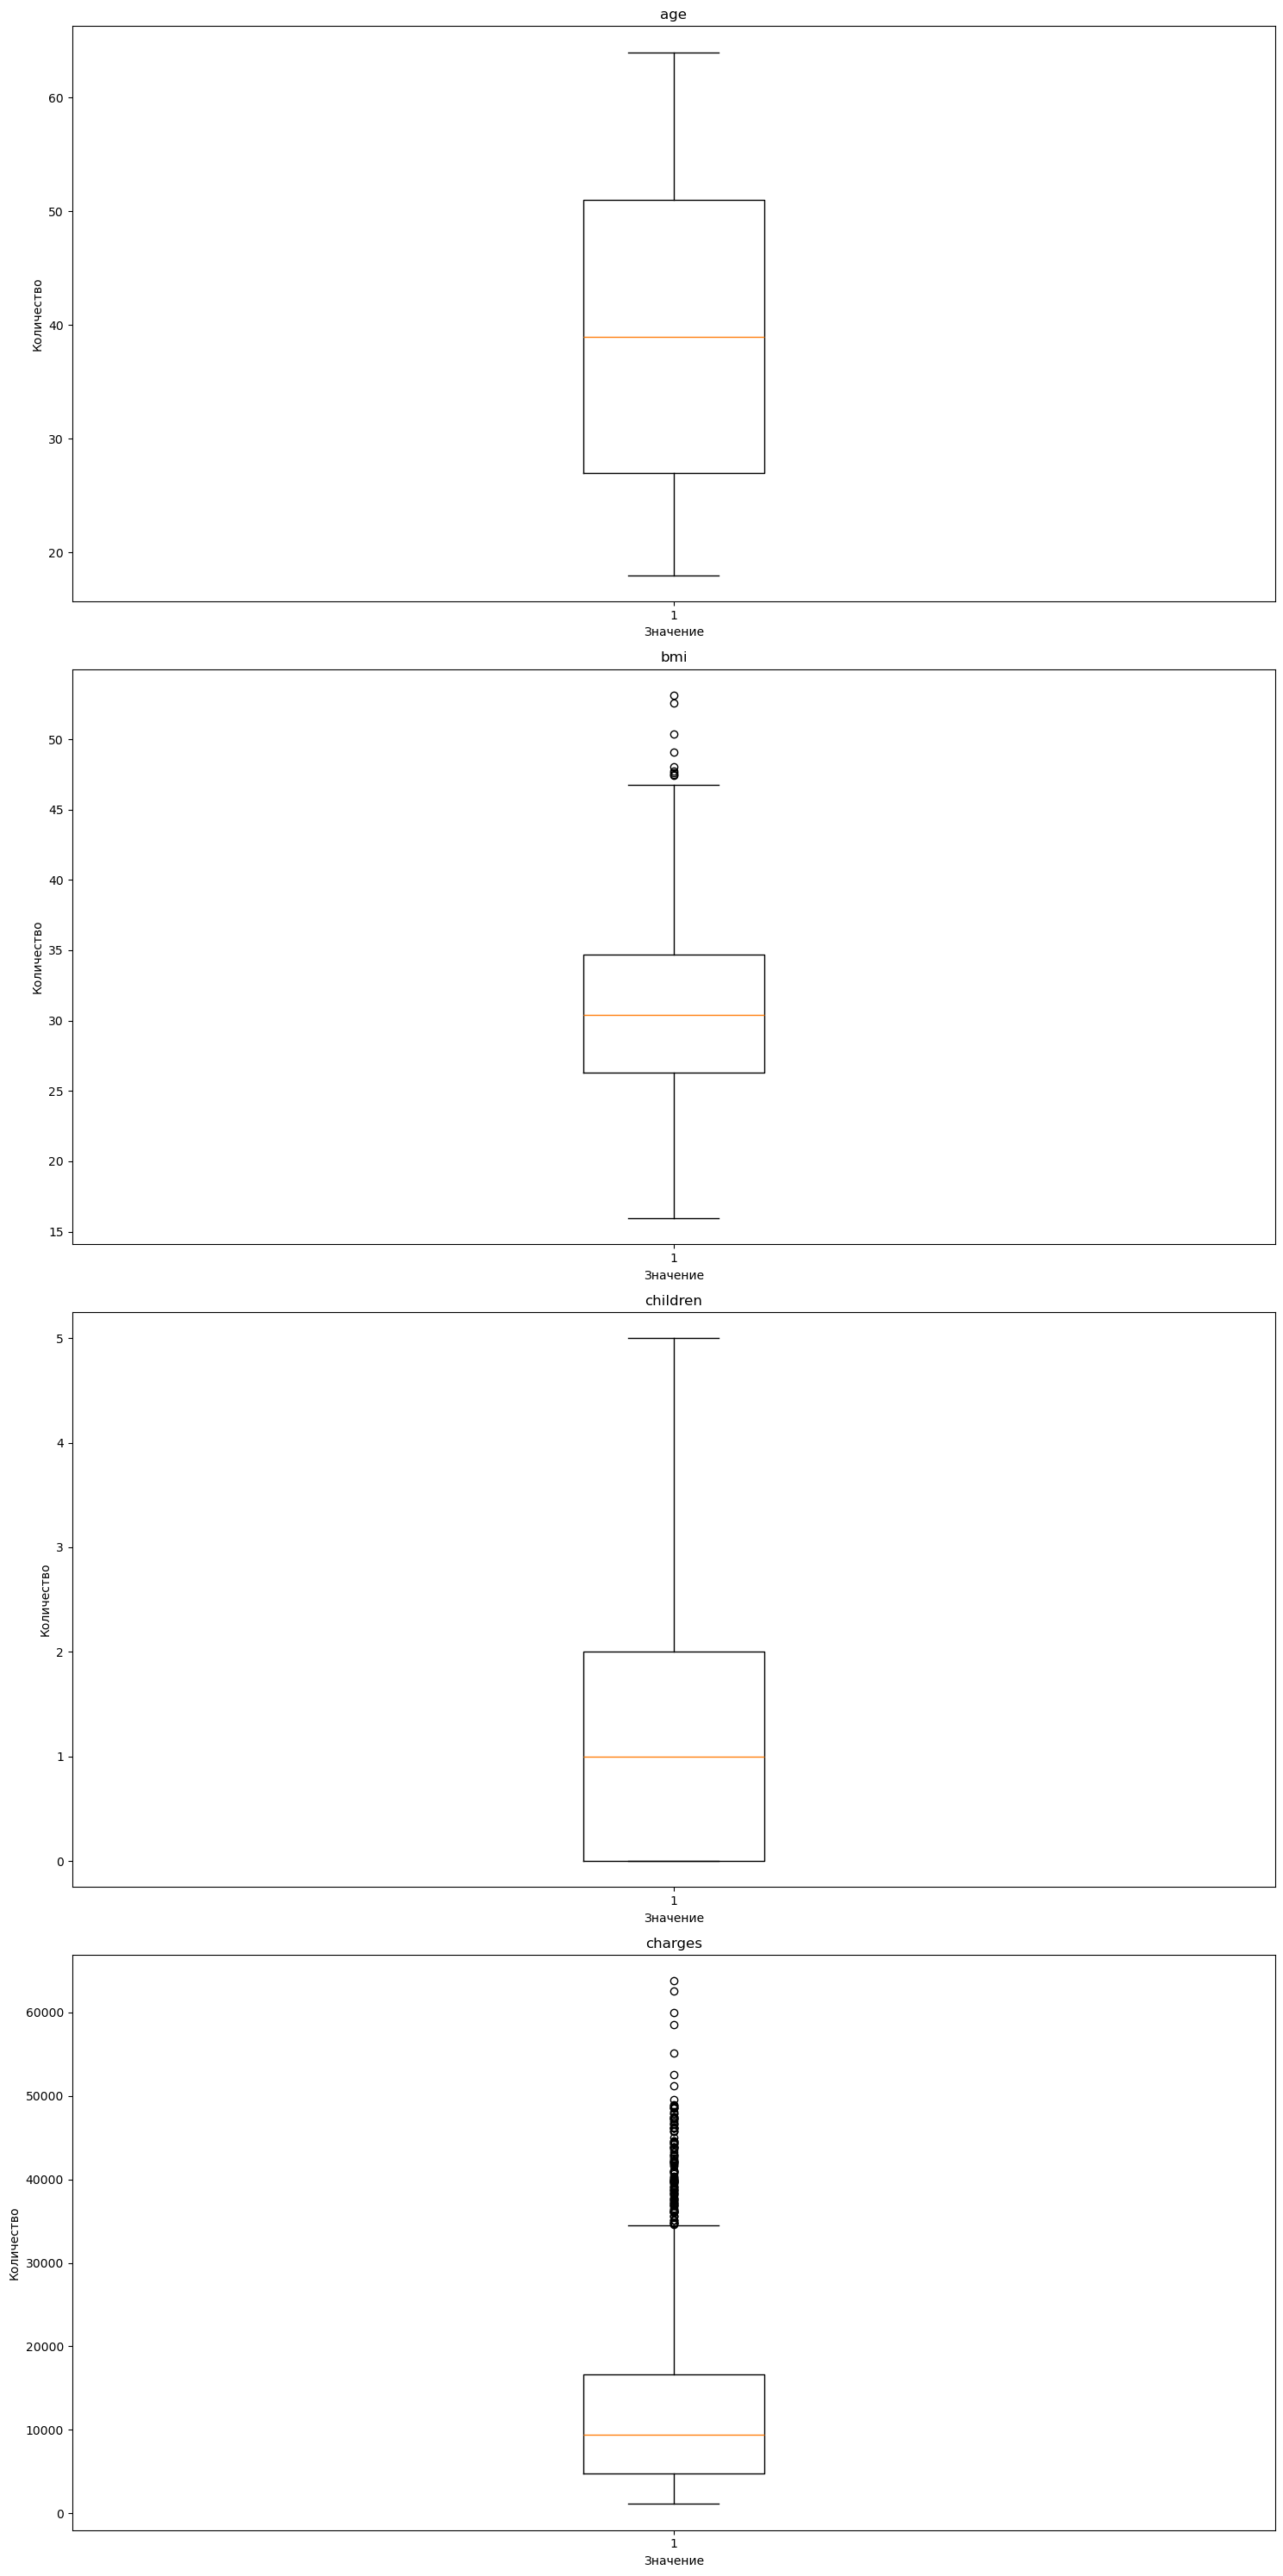

In [7]:
fig, axs = plt.subplots(len(numerical_columns), 1, figsize=(15, 30))

for i, column in enumerate(numerical_columns):
    axs[i].boxplot(df[column])
    axs[i].set_title(column)
    axs[i].set_xlabel('Значение')
    axs[i].set_ylabel('Количество')

plt.tight_layout()
plt.show()

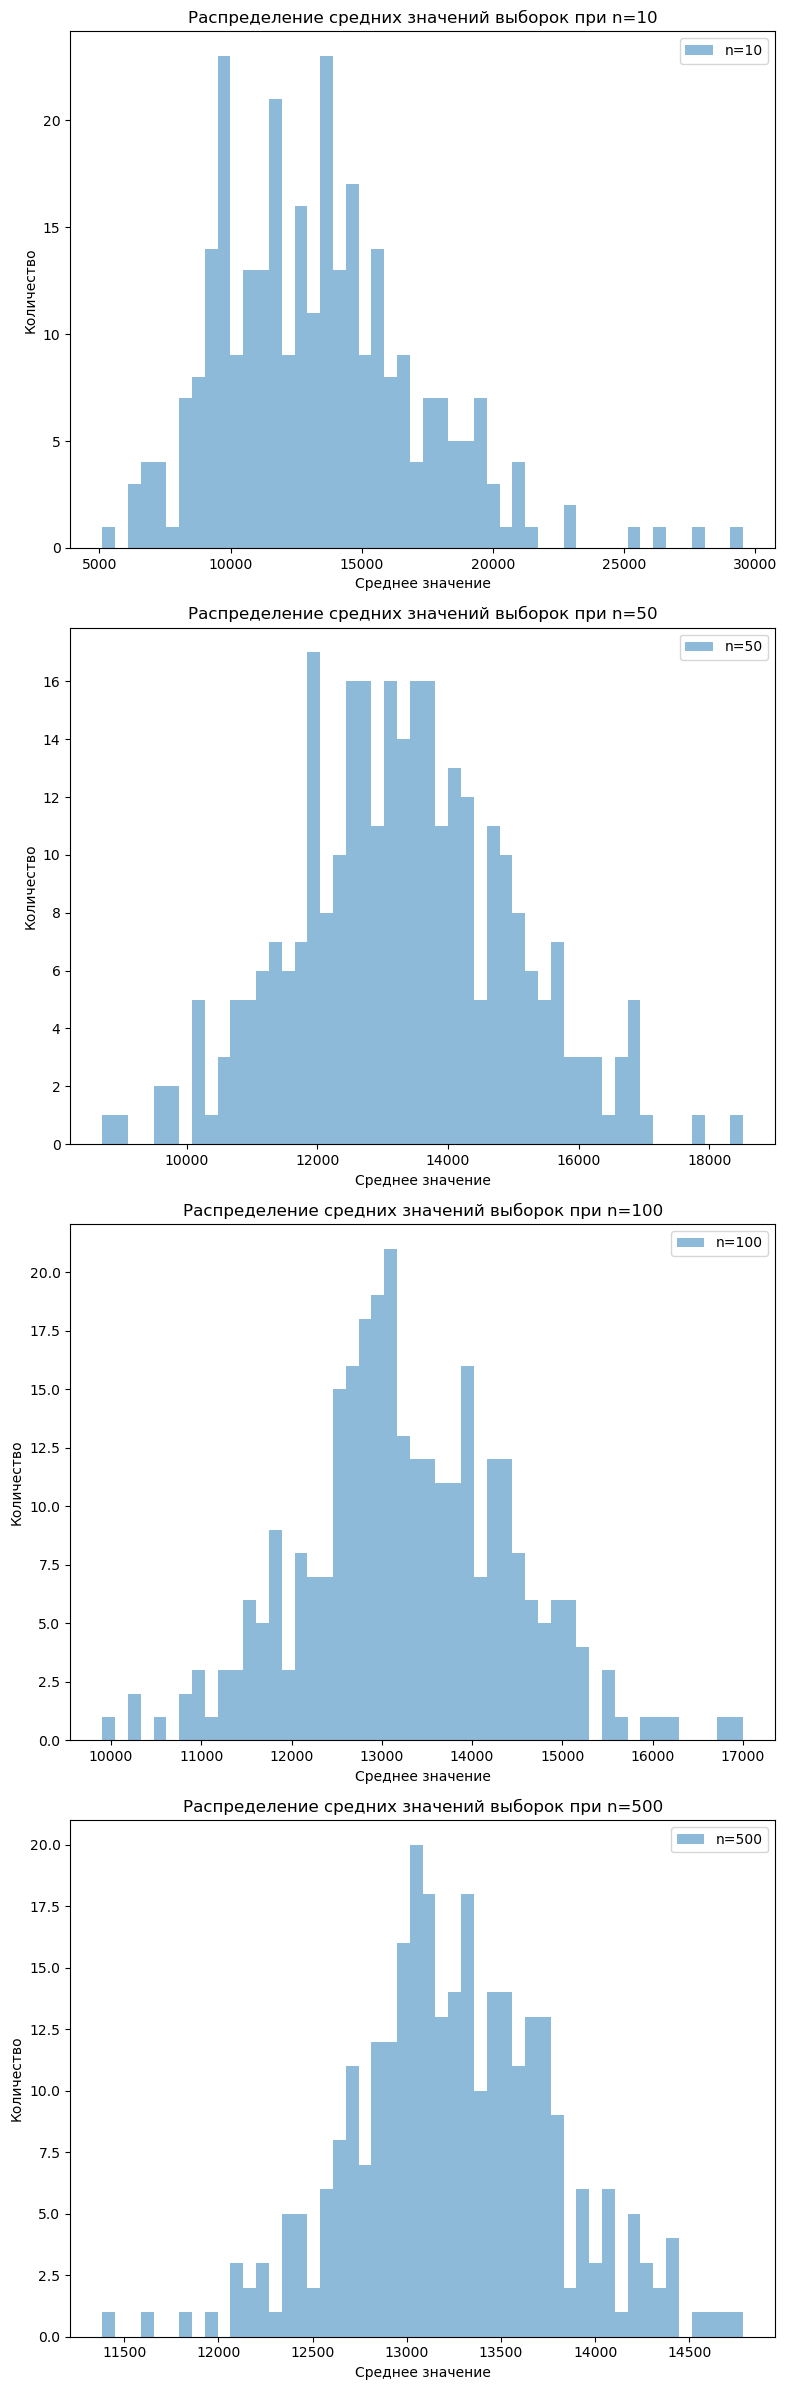

При n=10 стандартное отклонение средних значений выборок равно 3824.94
При n=10 среднее средних значений выборок равно 13372.28
При n=50 стандартное отклонение средних значений выборок равно 1649.30
При n=50 среднее средних значений выборок равно 13322.51
При n=100 стандартное отклонение средних значений выборок равно 1144.69
При n=100 среднее средних значений выборок равно 13274.07
При n=500 стандартное отклонение средних значений выборок равно 546.95
При n=500 среднее средних значений выборок равно 13247.25


In [9]:
import numpy as np

charges = df['charges']
n_values = [10, 50, 100, 500]
means = np.zeros((len(n_values), 300))
stds = np.zeros((len(n_values), 300))

for i, n in enumerate(n_values):
    for j in range(300):
        sample = np.random.choice(charges, size=n, replace=True)
        means[i, j] = np.mean(sample)
        stds[i, j] = np.std(sample)

fig, axs = plt.subplots(len(n_values), 1, figsize=(8, 6 * len(n_values)))

for i, n in enumerate(n_values):
    axs[i].hist(means[i, :], bins=50, alpha=0.5, label=f'n={n}')
    axs[i].set_title(f'Распределение средних значений выборок при n={n}')
    axs[i].set_xlabel('Среднее значение')
    axs[i].set_ylabel('Количество')
    axs[i].legend()

plt.tight_layout()
plt.show()

for i, n in enumerate(n_values):
    print(f'При n={n} стандартное отклонение средних значений выборок равно {np.std(means[i, :]):.2f}')
    print(f'При n={n} среднее средних значений выборок равно {np.mean(means[i, :]):.2f}')

In [10]:
from scipy import stats


charges = df['charges']
bmi = df['bmi']

charges_mean = np.mean(charges)
charges_std = np.std(charges)
bmi_mean = np.mean(bmi)
bmi_std = np.std(bmi)

charges_ci_95 = stats.t.interval(0.95, len(charges)-1, loc=charges_mean, scale=charges_std/np.sqrt(len(charges)))
charges_ci_99 = stats.t.interval(0.99, len(charges)-1, loc=charges_mean, scale=charges_std/np.sqrt(len(charges)))

bmi_ci_95 = stats.t.interval(0.95, len(bmi)-1, loc=bmi_mean, scale=bmi_std/np.sqrt(len(bmi)))
bmi_ci_99 = stats.t.interval(0.99, len(bmi)-1, loc=bmi_mean, scale=bmi_std/np.sqrt(len(bmi)))

print('95% доверительный интервал для среднего значения charges:')
print(charges_ci_95)
print('99% доверительный интервал для среднего значения charges:')
print(charges_ci_99)
print('95% доверительный интервал для среднего значения bmi:')
print(bmi_ci_95)
print('99% доверительный интервал для среднего значения bmi:')
print(bmi_ci_99)

95% доверительный интервал для среднего значения charges:
(12621.196780689985, 13919.647749592528)
99% доверительный интервал для среднего значения charges:
(12416.749133019599, 14124.095397262914)
95% доверительный интервал для среднего значения bmi:
(30.336469141876517, 30.99032458009658)
99% доверительный интервал для среднего значения bmi:
(30.233516308491083, 31.093277413482014)
